In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [4]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [5]:
from IPython.display import HTML
style = '<style>svg{width:30% !important;height:30% !important;}</style>'
HTML(style)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
titanic_data = pd.read_csv('C:/Users/natag/Documents/datascience/titanic/train.csv', encoding='windows-1251')

In [11]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [14]:
X = pd.get_dummies(X)

In [15]:
X = X.fillna({'Age': X.Age.median()})

In [16]:
clf = tree.DecisionTreeClassifier()

In [17]:
clf.fit(X, y)

DecisionTreeClassifier()

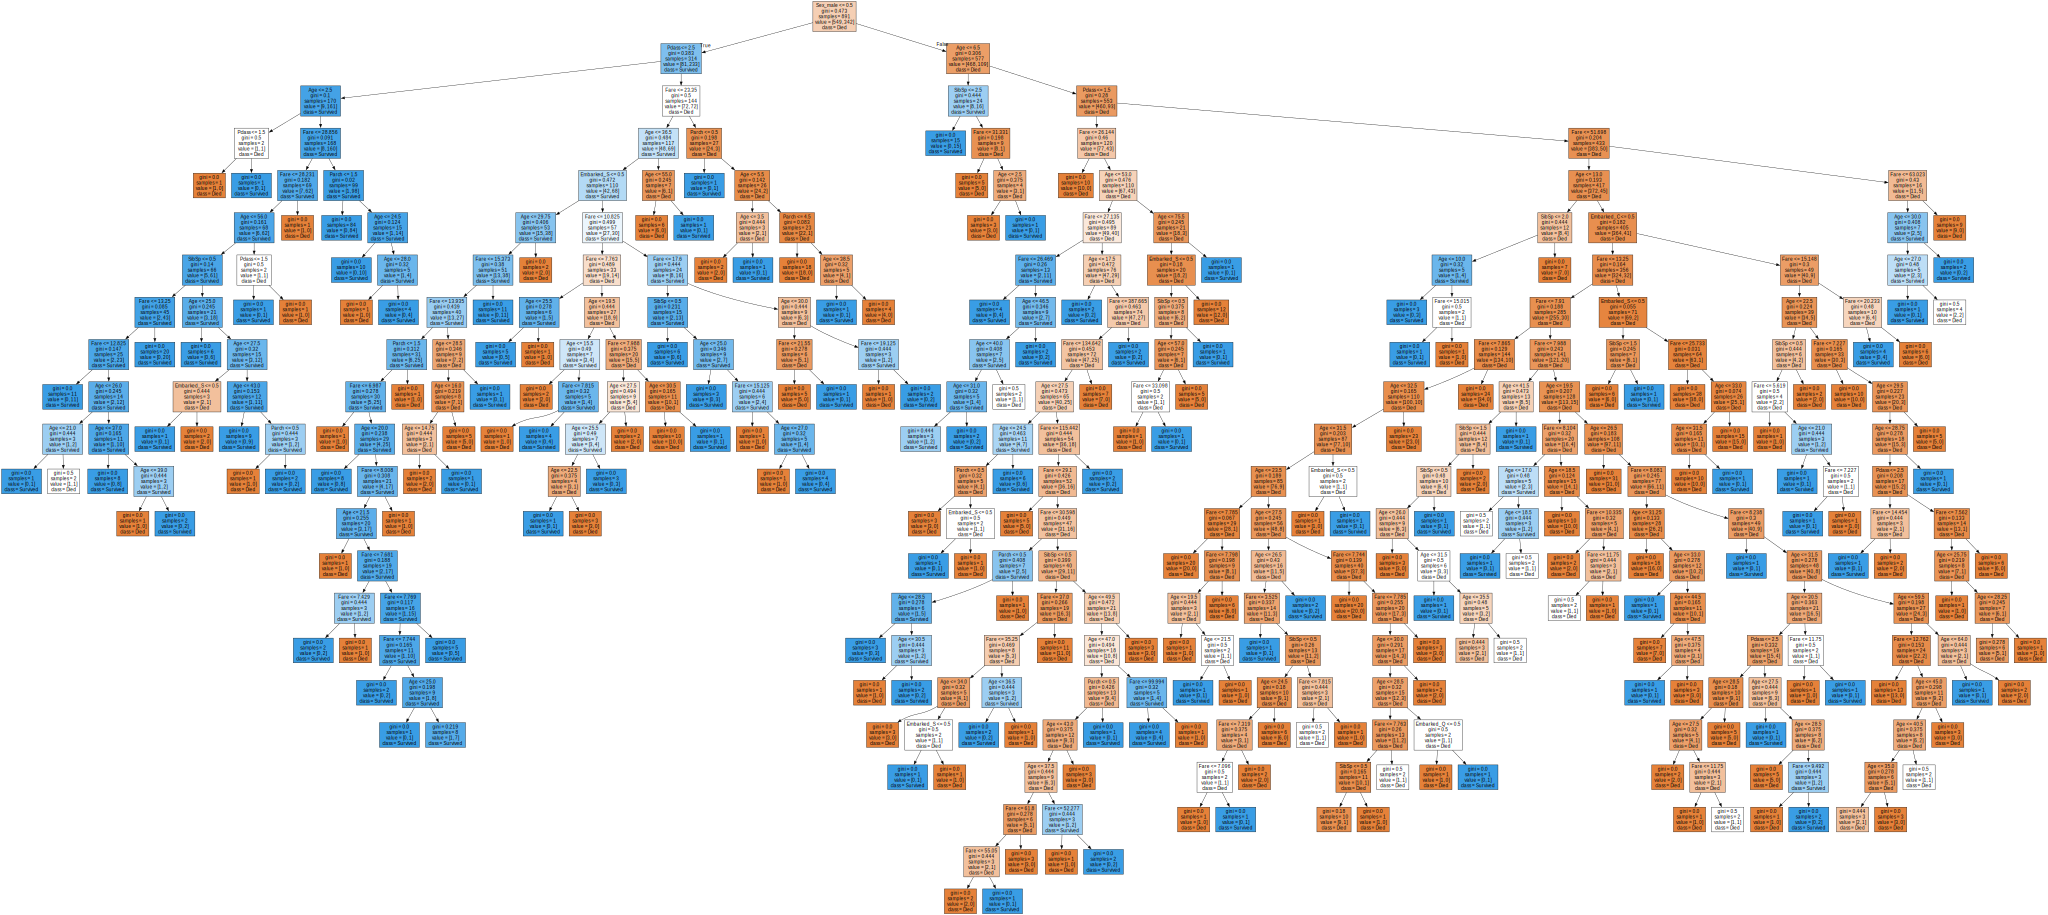

In [18]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7389830508474576

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8203389830508474

In [24]:
max_depth_values = range(1, 100)

In [25]:
scores_data = pd.DataFrame()

In [26]:
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [27]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

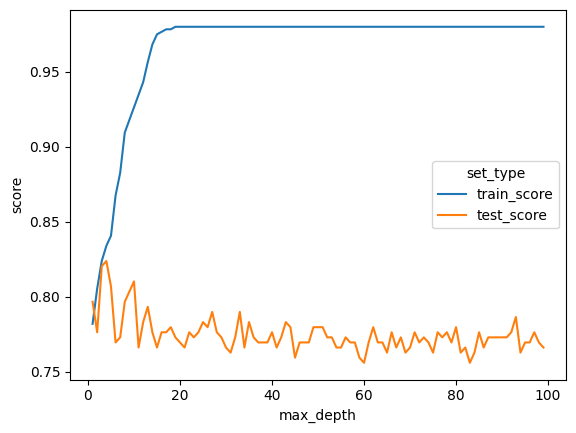

In [28]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [31]:
scores_data = pd.DataFrame()

In [32]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [33]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

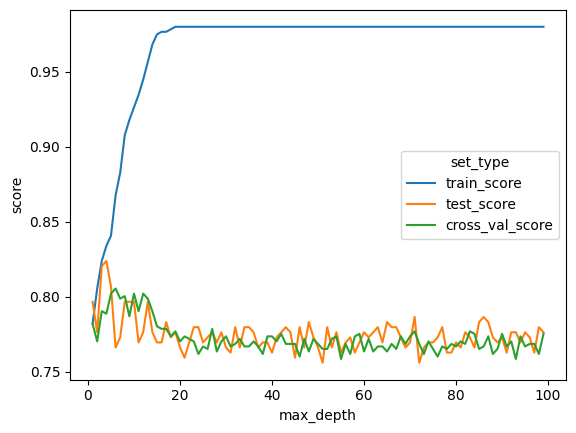

In [34]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [35]:
scores_data_long[scores_data_long.set_type == 'cross_val_score'].sort_values('score', ascending=False)

,max_depth,set_type,score
203,6,cross_val_score,0.805434
202,5,cross_val_score,0.802073
209,12,cross_val_score,0.802059
207,10,cross_val_score,0.802031
205,8,cross_val_score,0.800364
...,...,...,...
270,73,cross_val_score,0.761765
243,46,cross_val_score,0.760098
273,76,cross_val_score,0.760098
290,93,cross_val_score,0.758431


In [36]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7864406779661017

In [37]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [38]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [39]:
best_clf = grid_search_cv_clf.best_estimator_ 

In [40]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [42]:
y_predict = best_clf.predict(X_test)

In [43]:
precision_score(y_test, y_predict)

0.8125

In [44]:
recall_score(y_test, y_predict)

0.65

In [45]:
f1_score(y_test, y_predict)

0.7222222222222223

In [46]:
y_predicted_prob = best_clf.predict_proba(X_test)

<Axes: >

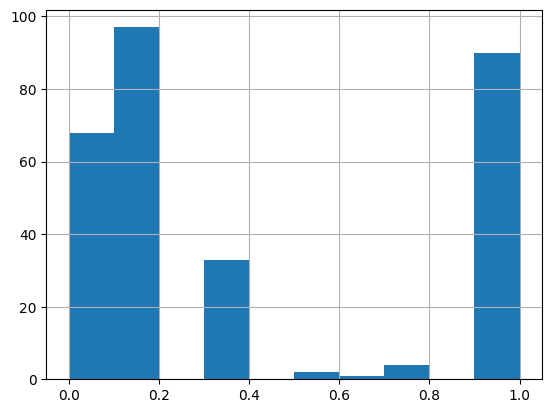

In [47]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [48]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [49]:
precision_score(y_test, y_pred)

0.8222222222222222

In [50]:
recall_score(y_test, y_pred)

0.6166666666666667

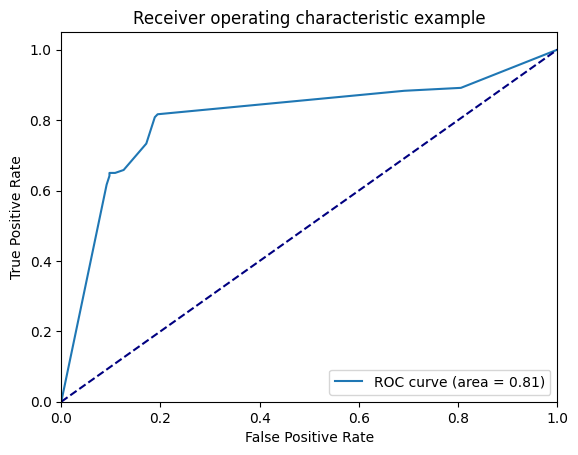

In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [52]:
train_data_tree = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
X_train_data_tree = train_data_tree.drop('num', axis=1)
y_train_data_tree = train_data_tree.num
clf_train_data_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_train_data_tree.fit(X_train_data_tree, y_train_data_tree)

DecisionTreeClassifier(criterion='entropy')

In [53]:
graph = Source(tree.export_graphviz(clf_train_data_tree, out_file=None,
                                   feature_names=list(X_train_data_tree),
                                   class_names=['Ill', 'Healthy'],
                                   filled=True))
# display(SVG(graph.pipe(format='svg')))

In [54]:
#0.996 - (0.903 * 157 + 0.826 * 81) / 238

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, y_pred)
# При классификации модель может допускать ошибки, присваивая наблюдению неверный класс.
# Существуют различные метрики оценки качества предсказаний, 
# которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, 
# соответствующих тому какой класс был присвоен наблюдениям каждого из классов.
# Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

array([[159,  16],
       [ 46,  74]], dtype=int64)

In [57]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [58]:
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parameters, cv=5)

In [59]:
grid_search_cv_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [60]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [61]:
best_clf_rf = grid_search_cv_clf_rf.best_estimator_

In [62]:
best_clf_rf.score(X_test, y_test)

0.7966101694915254

In [63]:
feature_importances = best_clf.feature_importances_

In [64]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})

In [65]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.328127
1,Age,0.219023
4,Fare,0.190485
0,Pclass,0.163583
2,SibSp,0.059526
9,Embarked_S,0.013286
7,Embarked_C,0.013216
8,Embarked_Q,0.009383
3,Parch,0.003371
5,Sex_female,0.000000


In [66]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [91]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [92]:
X_heart_disease = heart_disease.drop('target', axis=1)

In [93]:
y_heart_disease = heart_disease.target

In [94]:
rf.fit(X_heart_disease, y_heart_disease)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [95]:
feature_heart_disease = rf.feature_importances_

In [96]:
feature_heart_disease_df = pd.DataFrame(feature_heart_disease, index=X_heart_disease.columns, columns=['importance'])

<Axes: >

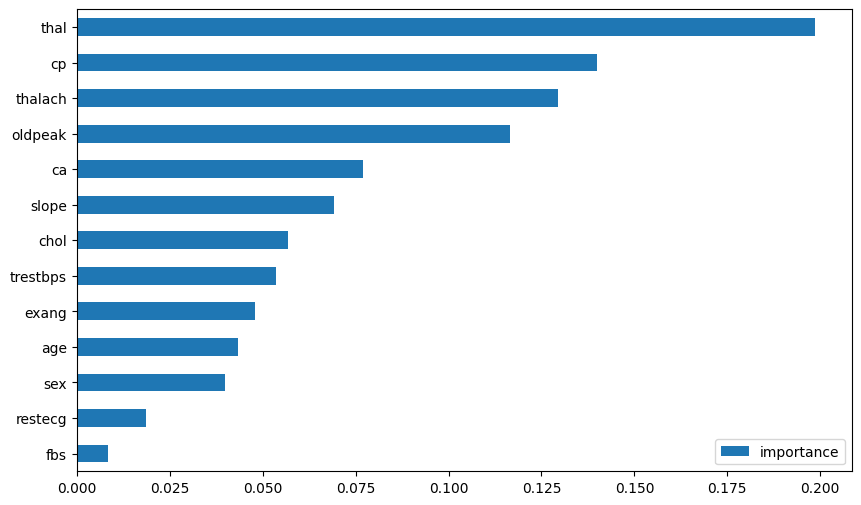

In [97]:
feature_heart_disease_df.sort_values('importance').plot(kind='barh', figsize=(10, 6))